<a href="https://colab.research.google.com/github/murtazaarsh7/Web/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
''' y=wX+b
y=dependent variable
X=independent variable
w=weight
b=bias
gradient descent
gradient descent is an optimizing algo used for minimizing loss funct in varous ml algos.

w=w-a*dw
b=b-a*db

a= learning rate
Machine Learning, the learning rate (η or α) is a hyperparameter that controls how big a step the model takes when updating weights during training (e.g., in gradient descent).

🔎 Why it matters

If the learning rate is too small → training is very slow, model takes tiny steps.

If the learning rate is too large → training might overshoot the minimum and fail to converge (or bounce around).

The ideal learning rate makes training fast but stable.
'''


' y=wX+b\ny=dependent variable\nX=independent variable\nw=weight\nb=bias\ngradient descent\ngradient descent is an optimizing algo used for minimizing loss funct in varous ml algos.\n\nw=w-a*dw\nb=b-a*db\n\na= learning rate\nMachine Learning, the learning rate (η or α) is a hyperparameter that controls how big a step the model takes when updating weights during training (e.g., in gradient descent).\n\n🔎 Why it matters\n\nIf the learning rate is too small → training is very slow, model takes tiny steps.\n\nIf the learning rate is too large → training might overshoot the minimum and fail to converge (or bounce around).\n\nThe ideal learning rate makes training fast but stable.\n'

***LINEAR REGRESSION***

In [8]:
class Linear_Regression():
  #initiating the parameters(leraning_rate and no. of iterations)
  def __init__(self,learning_rate,no_of_iterations):

    self.learning_rate=learning_rate
    self.no_of_iterations=no_of_iterations

  def fit(self,X,y):
    #no of training examples & number of features
    #rows      columns
    # |         |
    self.m,self.n=X.shape #no of rows and columns


    #initiatig weight and bias

    self.w=np.zeros(self.n)#equals to features in this case on;y 1 column
    self.b=0
    self.X=X
    self.y=y

    # implementing gradient descent
    for i in range(self.no_of_iterations):
      self.update_weights()

  def update_weights(self):
    y_predict=self.predict(self.X)
    #calculate readings
    dw=-(2*(self.X.T).dot(self.y-y_predict))/self.m
    db=-(2*np.sum(self.y-y_predict))/self.m

    #updating the weights

    self.w=self.w-self.learning_rate*dw
    self.b=self.b-self.learning_rate*db

  def predict(self,X):

    return X.dot(self.w)+self.b




In [9]:
from google.colab import files
import pandas as pd
import io

# Upload file
uploaded = files.upload()

# Show uploaded file names
print(uploaded.keys())

# Load dataset using the actual filename
filename = list(uploaded.keys())[0]   # automatically take the first uploaded file
df = pd.read_csv(io.BytesIO(uploaded[filename]))

print(df.head())


Saving salary_data (1).csv to salary_data (1).csv
dict_keys(['salary_data (1).csv'])
   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0


In [10]:
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [11]:
#import
from sklearn.model_selection import train_test_split

In [12]:
df.shape

(30, 2)

In [13]:
df.isnull().sum()

,0
YearsExperience,0
Salary,0


In [14]:
X=df.iloc[:,:-1].values
Y=df.iloc[:,1].values

In [15]:
#splitting dataset into training and testing

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33,random_state=2)

training the regression model





In [72]:
model=Linear_Regression(learning_rate=0.02,no_of_iterations=1000)

In [73]:
model.fit(X_train,Y_train)

In [62]:
#printing the parametrs values(weights & bias)

In [74]:
print('weight=',model.w[0])
print('bias=',model.b)

weight= 9514.400999035135
bias= 23697.406507136307


y=9514*(X)+ 23697

In [75]:
test_data_prediction=model.predict(X_test)
test_data_prediction

array([ 36066.12780588,  34163.24760607,  66512.21100279,  58900.69020357,
        91249.65360029,  80783.81250135, 101715.49469922,  52240.60950424,
        42726.20850521,  88395.33330058])

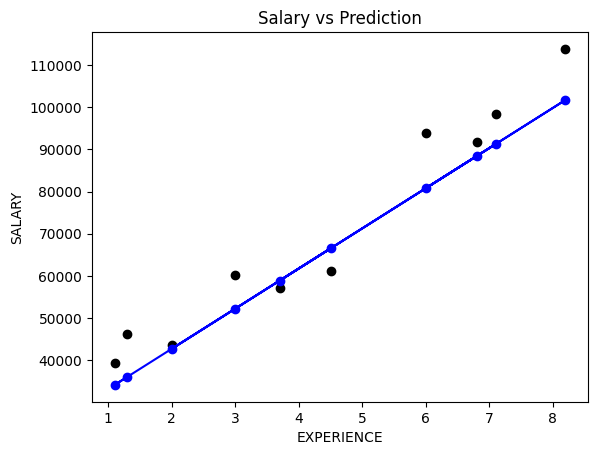

In [76]:
plt.scatter(X_test,Y_test,color='black')
plt.plot(X_test,test_data_prediction,marker='o',color='blue')
plt.xlabel('EXPERIENCE')
plt.ylabel('SALARY')
plt.title("Salary vs Prediction")
plt.show()